Based on [Data Science for Beginners](https://microsoft.github.io/Data-Science-For-Beginners/#/) by Microsoft.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from ipywidgets import interact
import ipywidgets as widgets
from typing import Union
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [3]:
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

In [4]:
base_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/" # loading from Internet
# base_url = "../../data/COVID/" # loading from disk
infected_dataset_url = base_url + "time_series_covid19_confirmed_global.csv"
recovered_dataset_url = base_url + "time_series_covid19_recovered_global.csv"
deaths_dataset_url = base_url + "time_series_covid19_deaths_global.csv"
countries_dataset_url = base_url + "../UID_ISO_FIPS_LookUp_Table.csv"

In [5]:
infected_raw = pd.read_csv(infected_dataset_url)
recovered_raw = pd.read_csv(recovered_dataset_url)
deaths_raw = pd.read_csv(deaths_dataset_url)
countries_raw = pd.read_csv(countries_dataset_url)

In [6]:
infected_raw.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288


In [7]:
infected_raw[infected_raw['Country/Region']=='China']

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
59,Anhui,China,31.8257,117.2264,1,9,15,39,60,70,...,2275,2275,2275,2275,2275,2275,2275,2275,2275,2275
60,Beijing,China,40.1824,116.4142,14,22,36,41,68,80,...,40774,40774,40774,40774,40774,40774,40774,40774,40774,40774
61,Chongqing,China,30.0572,107.8740,6,9,27,57,75,110,...,14715,14715,14715,14715,14715,14715,14715,14715,14715,14715
62,Fujian,China,26.0789,117.9874,1,5,10,18,35,59,...,17122,17122,17122,17122,17122,17122,17122,17122,17122,17122
63,Gansu,China,35.7518,104.2861,0,2,2,4,7,14,...,1742,1742,1742,1742,1742,1742,1742,1742,1742,1742
64,Guangdong,China,23.3417,113.4244,26,32,53,78,111,151,...,103248,103248,103248,103248,103248,103248,103248,103248,103248,103248
65,Guangxi,China,23.8298,108.7881,2,5,23,23,36,46,...,13371,13371,13371,13371,13371,13371,13371,13371,13371,13371
66,Guizhou,China,26.8154,106.8748,1,3,3,4,5,7,...,2534,2534,2534,2534,2534,2534,2534,2534,2534,2534
67,Hainan,China,19.1959,109.7453,4,5,8,19,22,33,...,10483,10483,10483,10483,10483,10483,10483,10483,10483,10483
68,Hebei,China,39.5490,116.1306,1,1,2,8,13,18,...,3292,3292,3292,3292,3292,3292,3292,3292,3292,3292


In [8]:
infected = infected_raw.groupby('Country/Region').mean()
recovered = recovered_raw.groupby('Country/Region').mean()
deaths = deaths_raw.groupby('Country/Region').mean()

In [9]:
pop = countries_raw[countries_raw['Province_State'].isna()][['Country_Region', 'Population']]
pop.dropna(inplace=True)
pop.set_index('Country_Region', inplace=True)

In [10]:
pop.loc['Albania'][0]

2877800.0

In [11]:
def make_df(country:str, prop: bool=False) -> None:
    """
    For country create Data Frame with columns: infected, recovered, deaths.
    """
    
    if prop:
        div = pop.loc[country][0] / 100  # Divide population by 100 to get percents.
    else:
        div = 1
    
    df = pd.DataFrame({
        'infected': infected.loc[country][2:] / div, 
        'recovered':recovered.loc[country][2:] / div,
        'deaths': deaths.loc[country][2:] / div
    })
    
    return df

In [102]:
def show_trends(countries:Union[str, list], prop:bool=False):
    
    if isinstance(countries, str):
        fig, ax = plt.subplots(1, 1, figsize = (10, 4))
        ax.set_title(countries)
        df = make_df(countries, prop)
        correlation = df.corr().iloc[0]
        df.plot(ax=ax)
        ax.text(0.5, -.3,
                f'Infected-Recovered Correlation: {correlation[1]:.2f}\nInfected-Deaths Correlation: {correlation[2]:.2f}',
                transform=ax.transAxes,
                ha='center')
    
    elif isinstance(countries, list):
        fig, ax = plt.subplots(len(countries), 1, figsize = (10, 4 * len(countries)))

        if len(countries) == 1:
            ax.set_title(countries[0])
            df = make_df(countries[0], prop)
            correlation = df.corr().iloc[0]
            df.plot(ax=ax)
            ax.text(0.5, -0.3,
                f'Infected-Recovered Correlation: {correlation[1]:.2f}\nInfected-Deaths Correlation: {correlation[2]:.2f}',
                transform=ax.transAxes,
                ha='center')
        
        else:
            for i, ax in enumerate(ax.flatten()):
                ax.set_title(countries[i])
                df = make_df(countries[i], prop)
                correlation = df.corr().iloc[0]
                df.plot(ax=ax)
                ax.text(0.5, -0.3,
                    f'Infected-Recovered Correlation: {correlation[1]:.2f}\nInfected-Deaths Correlation: {correlation[2]:.2f}',
                    transform=ax.transAxes,
                    ha='center')

        plt.subplots_adjust(hspace=.5)

In [110]:
COUNTRIES = ['Poland', 'Germany', 'United Kingdom', 'US', 'China']

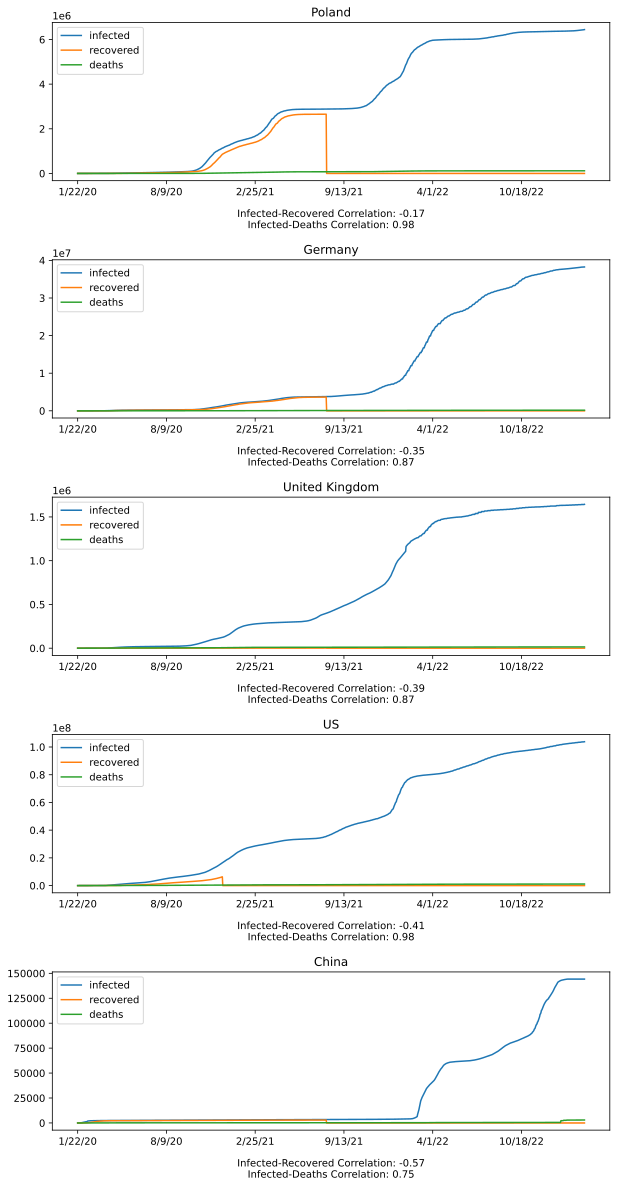

In [111]:
show_trends(COUNTRIES)

In [108]:
def show_trend_infected(countries:Union[str, list], prop:bool, rolling:bool=False, overlay:bool=False):
    
    if isinstance(countries, str):
        fig, ax = plt.subplots(1, 1, figsize = (10, 4))
        ax.set_title(countries)
        df = make_df(countries, prop)['infected']
        df = df.diff().rolling(7).mean() if rolling else df.diff()
        df.plot(ax=ax)
    
    elif isinstance(countries, list):
        if len(countries) == 1:
            fig, ax = plt.subplots(1,1,figsize=(10, 4))
            ax.set_title(countries[0])
            df = make_df(countries[0], prop)['infected']
            df = df.diff().rolling(7).mean() if rolling else df.diff()
            df.plot(ax=ax)
        
        elif len(countries) > 1 and not overlay:
            fig, ax = plt.subplots(len(countries), 1, figsize = (10, 4 * len(countries)))
            for i, ax in enumerate(ax.flatten()):
                ax.set_title(countries[i])
                df = make_df(countries[i], prop)['infected']
                df = df.diff().rolling(7).mean() if rolling else df.diff()
                df.plot(ax=ax)
                
        elif len(countries) > 1 and overlay:
            fig, ax = plt.subplots(1,1,figsize=(10, 4))
            for country in countries:
                ax.set_title('Infection Rates Comparison')
                df = make_df(country, prop)['infected']
                df = df.diff().rolling(7).mean() if rolling else df.diff()
                df.plot(ax=ax)
            ax.legend(countries)
        
    plt.subplots_adjust(hspace=.5)

Compute the rolling average of people infected each day.

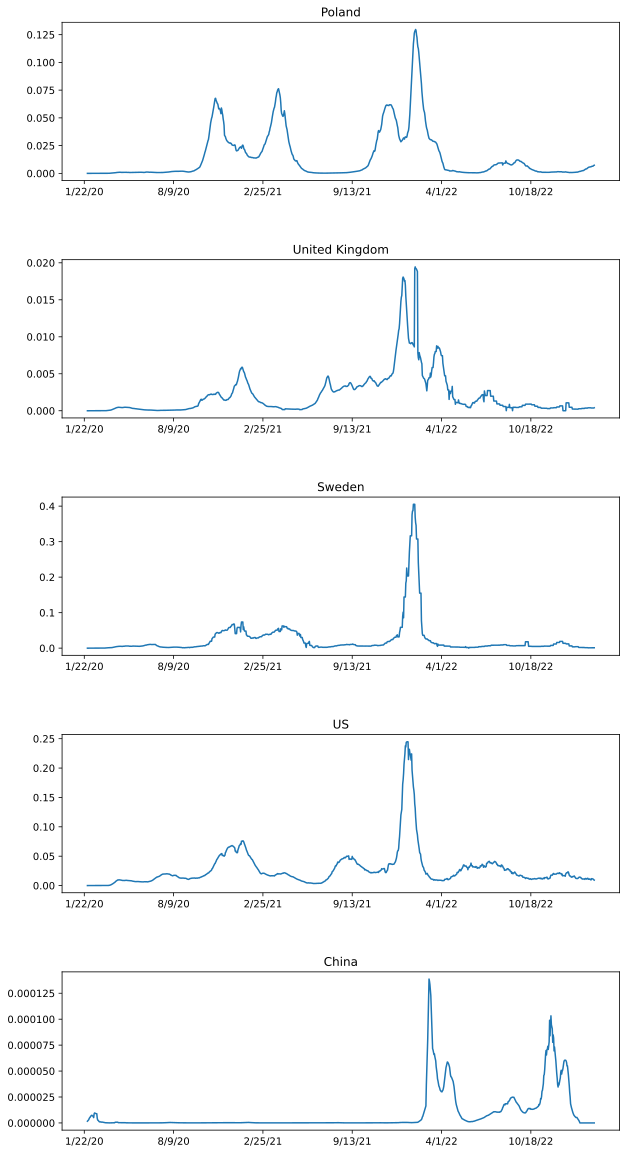

In [109]:
show_trend_infected(COUNTRIES, prop=True, rolling=True)

Display in single plot.

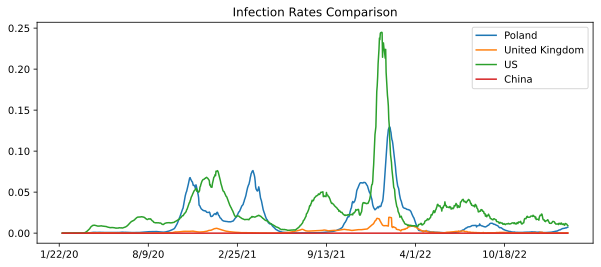

In [17]:
show_trend_infected(COUNTRIES, prop=True, rolling=True, overlay=True)

# Infected World

In [20]:
pop_series = pd.Series(data=pop['Population'])

Check if countries in two lists are overlapping:

In [23]:
[country for country in pop_series.index if country not in infected.index]

['Western Sahara']

In [24]:
pop_series.drop('Western Sahara', inplace=True)

In [25]:
infected_percent = infected.iloc[:, 2:].mean(axis=1).div(pop_series, fill_value=0)

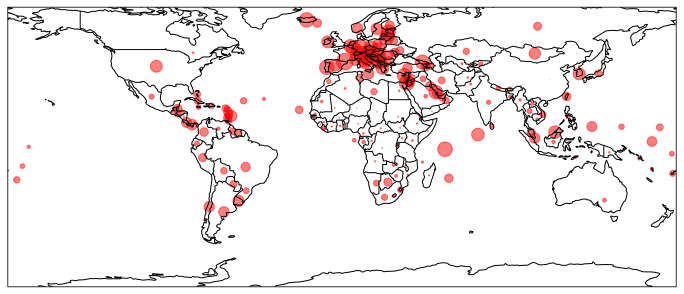

In [26]:
fig=plt.figure(figsize=(12,6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cfeature.BORDERS)
ax.scatter(infected['Long'],
           infected['Lat'],
           s=1000*infected_percent,
           c='red',
           alpha=0.5)

Interactive plot: shows COVID spread:

In [27]:
def plotit(step):
    fig=plt.figure(figsize=(12,6))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.coastlines()
    ax.add_feature(cfeature.BORDERS)
    ax.scatter(infected['Long'],
               infected['Lat'],
               s=infected.iloc[:, step] / 1e5,
               c='red',
               alpha=0.5)

interact(plotit, step=widgets.IntSlider(value=2, min=2, max=len(infected.columns[2:])-1))

interactive(children=(IntSlider(value=2, description='step', max=1142, min=2), Output()), _dom_classes=('widge…

<function __main__.plotit(step)>

# Computing $R_t$

**basic reproduction number** $R_0$, indicates the number of people an infected person would further infect. When $R_0$ is more than 1, the epidemic is likely to spread.

$$R_t=\frac{I_{t-7}+I_{t-6}+I_{t-5}+I_{t-4}}{I_{t-3}+I_{t-2}+I_{t-1}+I_t}$$

where $I_t$ is the number of newly infected individuals on day $t$

In [28]:
def show_trend_infected(countries:Union[str, list], prop:bool, rolling:bool=False, overlay:bool=False):
    
    if isinstance(countries, str):
        fig, ax = plt.subplots(1, 1, figsize = (10, 4))
        ax.set_title(countries)
        df = make_df(countries, prop)['infected']
        df = df.diff().rolling(7).mean() if rolling else df.diff()
        df.plot(ax=ax)
    
    elif isinstance(countries, list):
        if len(countries) == 1:
            fig, ax = plt.subplots(1,1,figsize=(10, 4))
            ax.set_title(countries[0])
            df = make_df(countries[0], prop)['infected']
            df = df.diff().rolling(7).mean() if rolling else df.diff()
            df.plot(ax=ax)
        
        elif len(countries) > 1 and not overlay:
            fig, ax = plt.subplots(len(countries), 1, figsize = (10, 4 * len(countries)))
            for i, ax in enumerate(ax.flatten()):
                ax.set_title(countries[i])
                df = make_df(countries[i], prop)['infected']
                df = df.diff().rolling(7).mean() if rolling else df.diff()
                df.plot(ax=ax)
                
        elif len(countries) > 1 and overlay:
            fig, ax = plt.subplots(1,1,figsize=(10, 4))
            for country in countries:
                ax.set_title('Infection Rates Comparison')
                df = make_df(country, prop)['infected']
                df = df.diff().rolling(7).mean() if rolling else df.diff()
                df.plot(ax=ax)
            ax.legend(countries)
        
    plt.subplots_adjust(hspace=.5)

In [29]:
def show_rt(countries:Union[str, list], overlay:bool=False):
    
    if isinstance(countries, str):
        fig, ax = plt.subplots(1, 1, figsize = (10, 4))
        ax.set_title(countries)
        
        df = make_df(countries)['infected']
        df['rt'] = df.diff().rolling(8).apply(lambda x: x[4:].sum()/x[:4].sum())  # Compute Rt
        
        df['rt'].plot(ax=ax)
        
        ax.axhline(1,linestyle='--',color='red')
        ax.set_ylim(0,6)
    
    elif isinstance(countries, list):

        if len(countries) == 1:
            fig, ax = plt.subplots(1,1,figsize=(10, 4))
            ax.set_title(countries[0])
            df = make_df(countries[0])['infected']
            df['rt'] = df.diff().rolling(8).apply(lambda x: x[4:].sum()/x[:4].sum())
            df['rt'].plot(ax=ax)
            ax.axhline(1,linestyle='--',color='red')
            ax.set_ylim(0,6)
        
        elif len(countries) > 1 and not overlay:
            fig, ax = plt.subplots(len(countries), 1, figsize = (10, 4 * len(countries)))
            for i, ax in enumerate(ax.flatten()):
                ax.set_title(countries[i])
                
                df = make_df(countries[i])['infected']
                df['rt'] = df.diff().rolling(8).apply(lambda x: x[4:].sum()/x[:4].sum())
                df['rt'].plot(ax=ax)
                ax.axhline(1,linestyle='--',color='red')
                ax.set_ylim(0,6)
                
        elif len(countries) > 1 and overlay:
            fig, ax = plt.subplots(1,1,figsize=(10, 4))
            ax.set_title('Comparison')
            for country in countries:
                df = make_df(country)['infected']
                df['rt'] = df.diff().rolling(8).apply(lambda x: x[4:].sum()/x[:4].sum())
                df['rt'].plot(ax=ax)
            ax.axhline(1,linestyle='--',color='red')
            ax.set_ylim(0,6)
            ax.legend(countries)
        
    plt.subplots_adjust(hspace=.5)

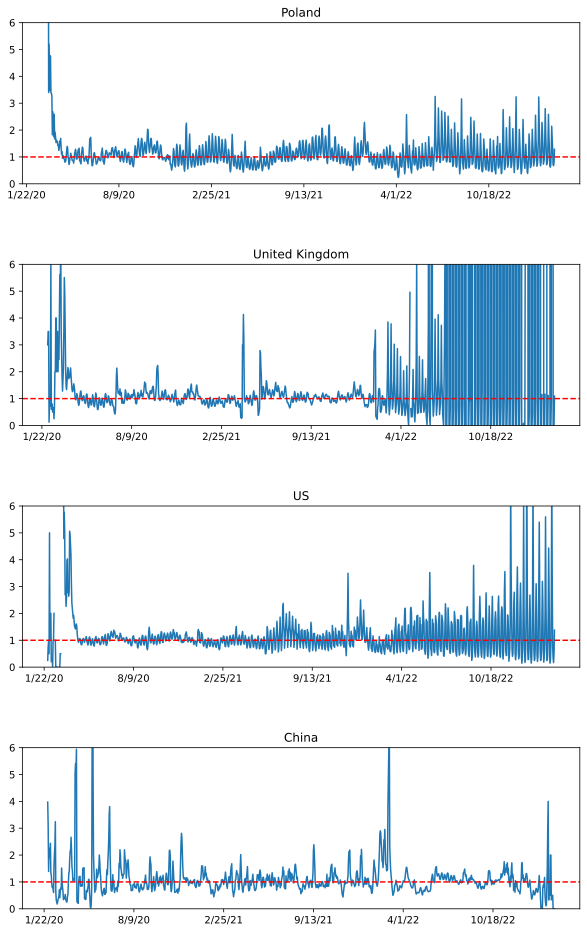

In [30]:
show_rt(COUNTRIES)

Display in single plot.

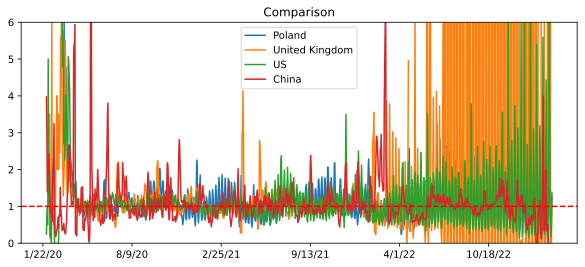

In [31]:
show_rt(COUNTRIES, overlay=True)

# Morality Rate

In [321]:
mortality_rate = deaths.iloc[:, 2:].mean(axis=1).div(infected.iloc[:, 2:].mean(axis=1))

In [322]:
mortality_rate.sort_values(ascending=False)

Country/Region
Korea, North            6.000000
MS Zaandam              0.222038
Yemen                   0.192329
Sudan                   0.074083
Peru                    0.068316
                          ...   
Holy See                0.000000
Tuvalu                  0.000000
Antarctica              0.000000
Winter Olympics 2022    0.000000
Summer Olympics 2020    0.000000
Length: 201, dtype: float64

Get rid off the outlier i.e. North Korea:

In [323]:
mortality_rate.drop('Korea, North', inplace=True)

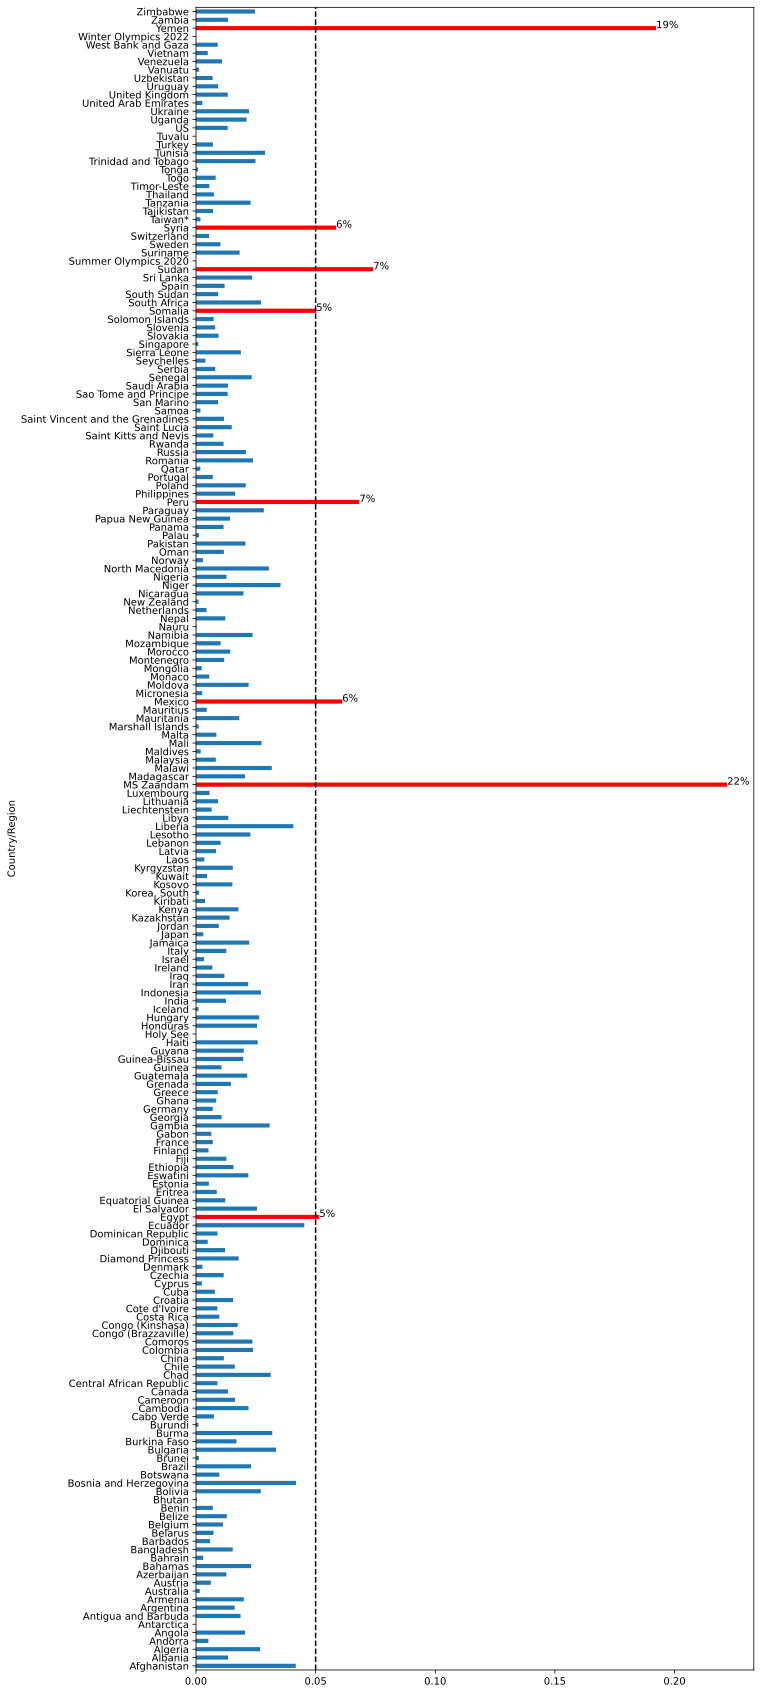

In [324]:
threshold = .05
cmap = (mortality_rate > threshold).map({True:'red', False:'#1f77b4'})

plt.figure(figsize=(10,30))
ax = mortality_rate.plot(kind='barh', color = cmap)

for i, value in enumerate(mortality_rate.values):
    if value > threshold:
        ax.text(value, i, f'{value*100:.0f}%')
ax.axvline(threshold, ls='--', color='black')
plt.show()